<a href="https://colab.research.google.com/github/Noman-494/my_new/blob/main/Laptop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/laptop_prices.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [5]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


In [6]:
df.isnull().sum()

,0
Company,0
Product,0
TypeName,0
Inches,0
Ram,0
OS,0
Weight,0
Price_euros,0
Screen,0
ScreenW,0


In [22]:
df_selected = df[['Company', 'TypeName', 'Inches', 'Ram','OS', 'Weight', 'Price_euros', 'CPU_freq', 'GPU_model']]



In [23]:
df_selected.head()

,Company,TypeName,Inches,Ram,OS,Weight,Price_euros,CPU_freq,GPU_model
0,Apple,Ultrabook,13.3,8,macOS,1.37,1339.69,2.3,Iris Plus Graphics 640
1,Apple,Ultrabook,13.3,8,macOS,1.34,898.94,1.8,HD Graphics 6000
2,HP,Notebook,15.6,8,No OS,1.86,575.00,2.5,HD Graphics 620
3,Apple,Ultrabook,15.4,16,macOS,1.83,2537.45,2.7,Radeon Pro 455
4,Apple,Ultrabook,13.3,8,macOS,1.37,1803.60,3.1,Iris Plus Graphics 650


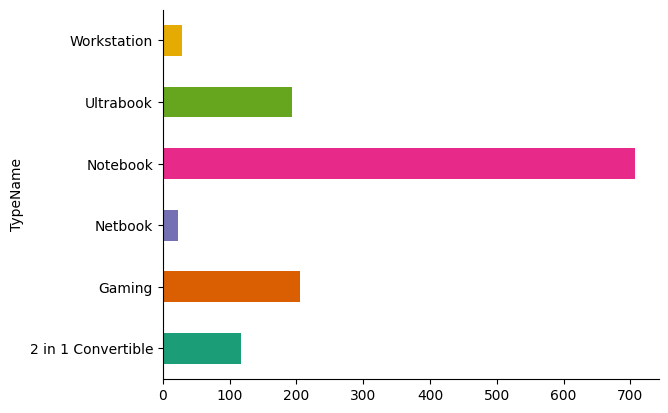

In [24]:
# @title TypeName

from matplotlib import pyplot as plt
import seaborn as sns
df_selected.groupby('TypeName').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

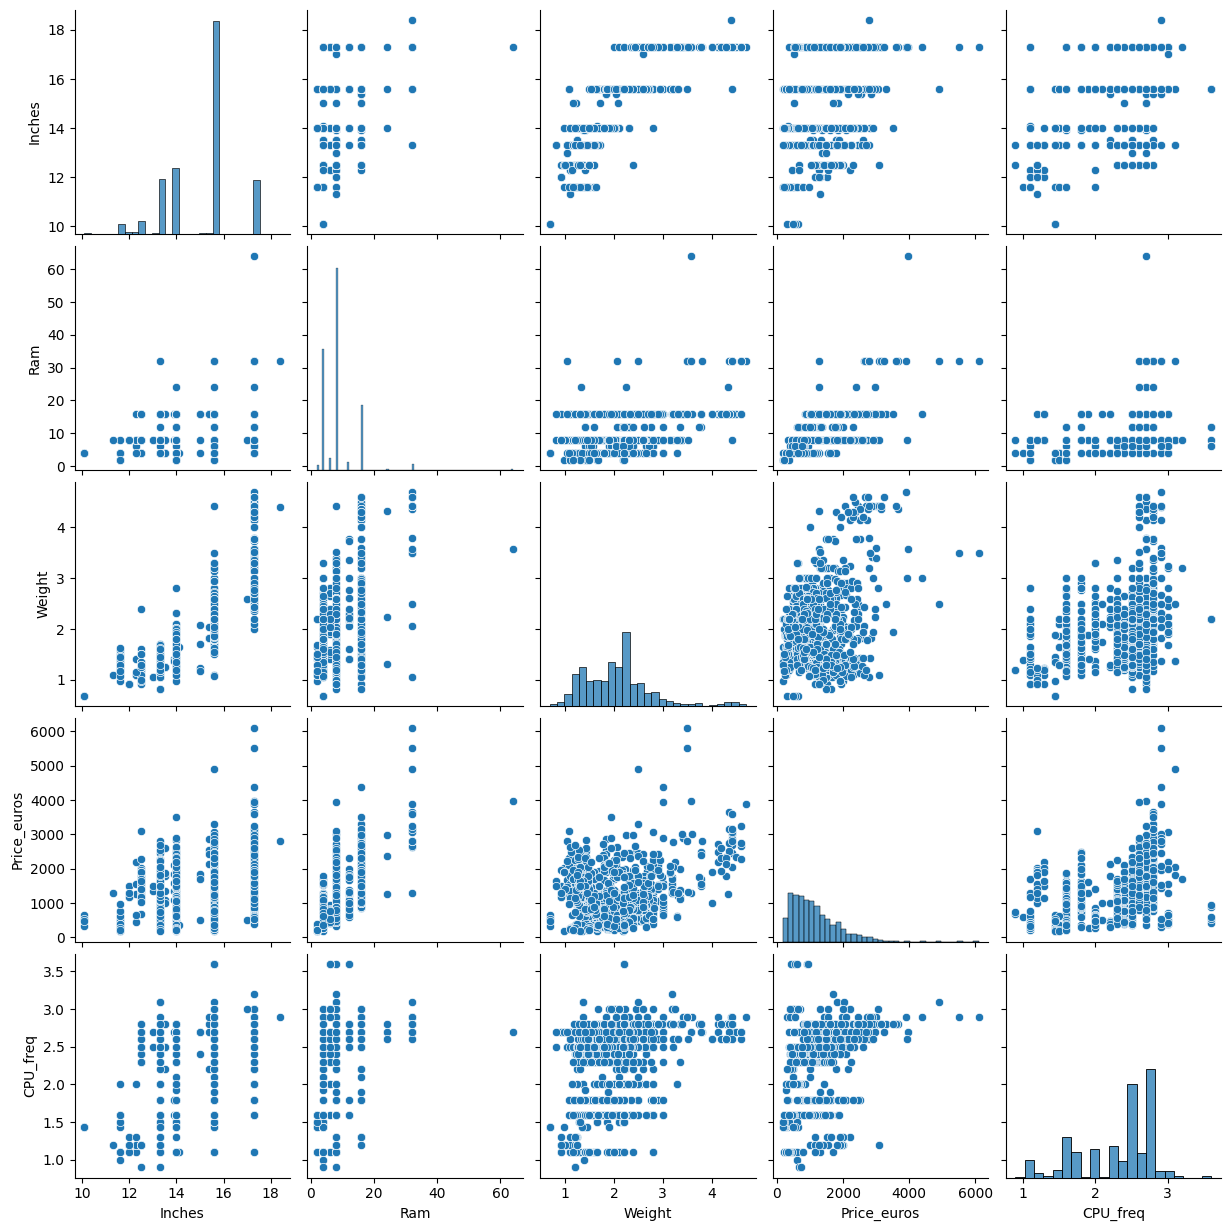

In [25]:
sns.pairplot(df_selected)


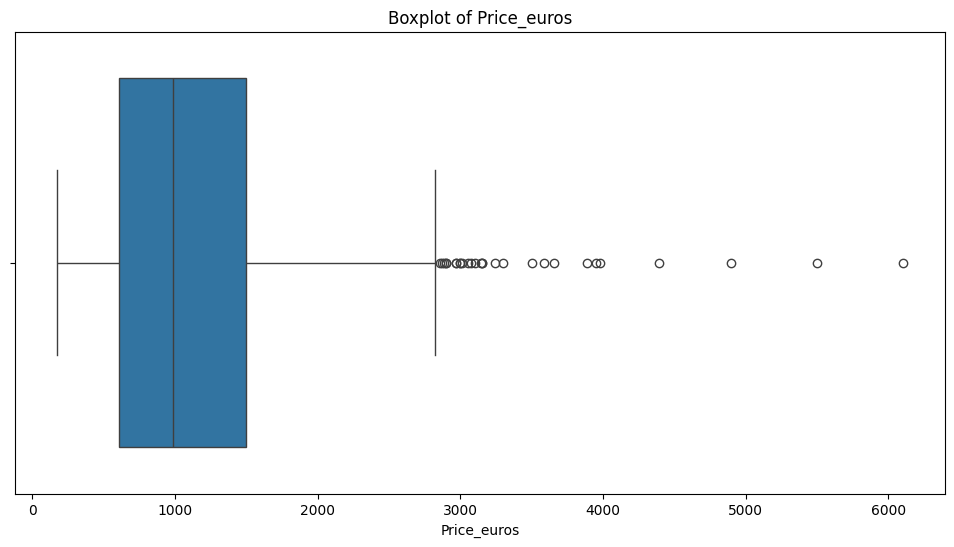

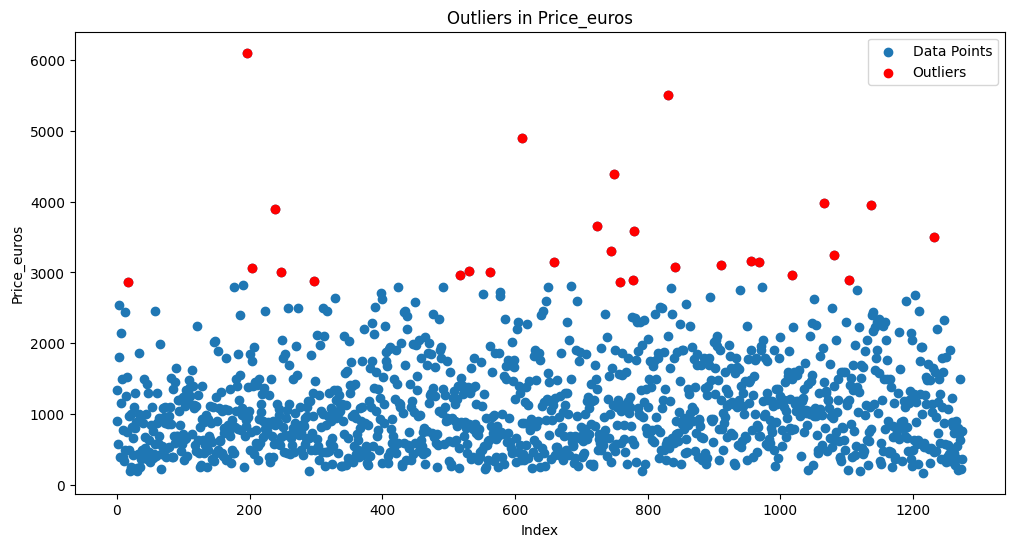

In [26]:
# prompt: identify outlier and plot

import matplotlib.pyplot as plt
# Identify outliers using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(x='Price_euros', data=df_selected)
plt.title('Boxplot of Price_euros')
plt.show()

# Identify outliers using IQR for Price_euros
Q1 = df_selected['Price_euros'].quantile(0.25)
Q3 = df_selected['Price_euros'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_price = df_selected[(df_selected['Price_euros'] < lower_bound) | (df_selected['Price_euros'] > upper_bound)]

# Plot the outliers
plt.figure(figsize=(12, 6))
plt.scatter(df_selected.index, df_selected['Price_euros'], label='Data Points')
plt.scatter(outliers_price.index, outliers_price['Price_euros'], color='red', label='Outliers')
plt.xlabel('Index')
plt.ylabel('Price_euros')
plt.title('Outliers in Price_euros')
plt.legend()
plt.show()

# You can repeat the process for other numerical features like Inches, Weight, etc.


In [27]:
# prompt: remove outliers

# Remove outliers based on IQR for Price_euros
df_no_outliers = df_selected[(df_selected['Price_euros'] >= lower_bound) & (df_selected['Price_euros'] <= upper_bound)]

# You can repeat the process for other numerical features like Inches, Weight, etc.

# Print the shape of the original and the new DataFrame
print(f"Original DataFrame shape: {df_selected.shape}")
print(f"DataFrame shape after removing outliers: {df_no_outliers.shape}")


Original DataFrame shape: (1275, 9)
DataFrame shape after removing outliers: (1247, 9)


In [28]:
df_no_outliers = df_selected[(df_selected['Inches'] >= lower_bound) & (df_selected['Inches'] <= upper_bound)]

In [29]:
print(f"Original DataFrame shape: {df_selected.shape}")
print(f"DataFrame shape after removing outliers: {df_no_outliers.shape}")


Original DataFrame shape: (1275, 9)
DataFrame shape after removing outliers: (1275, 9)


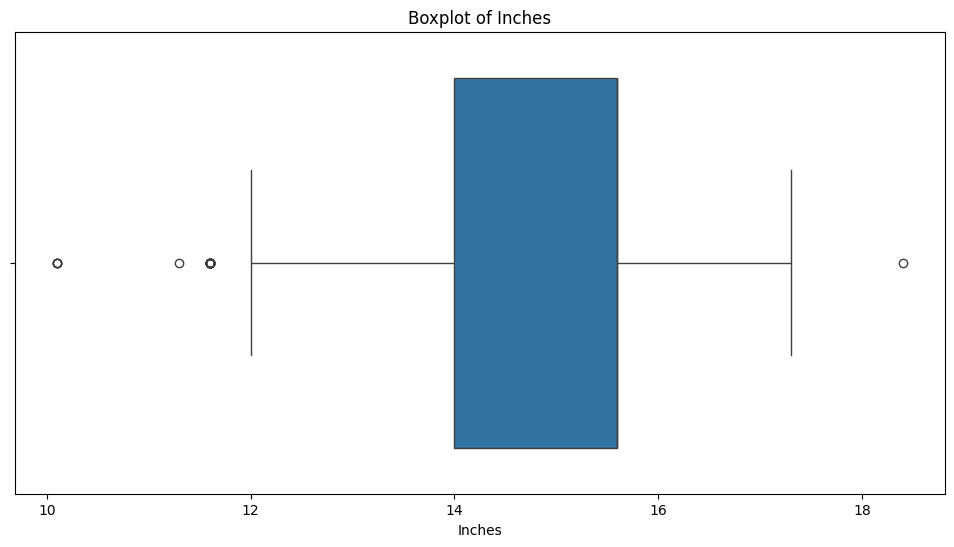

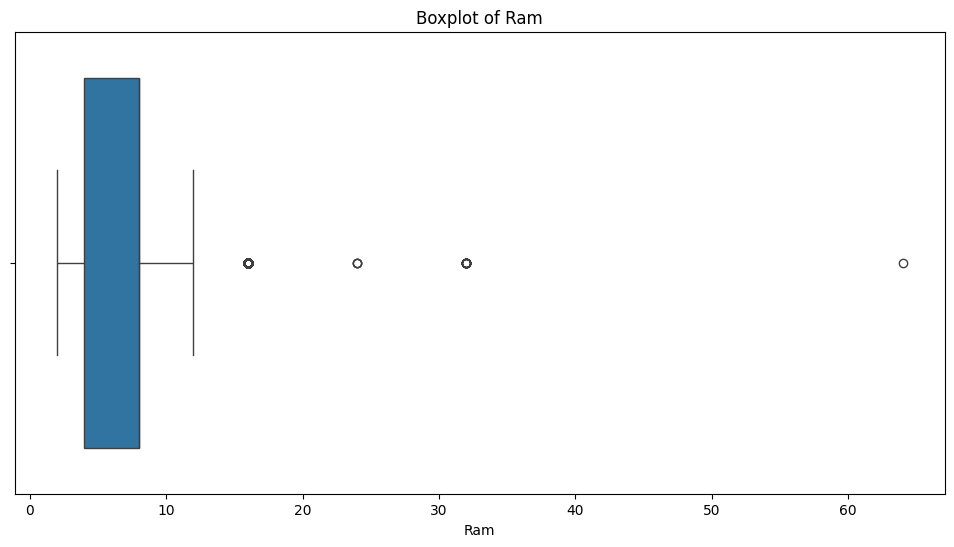

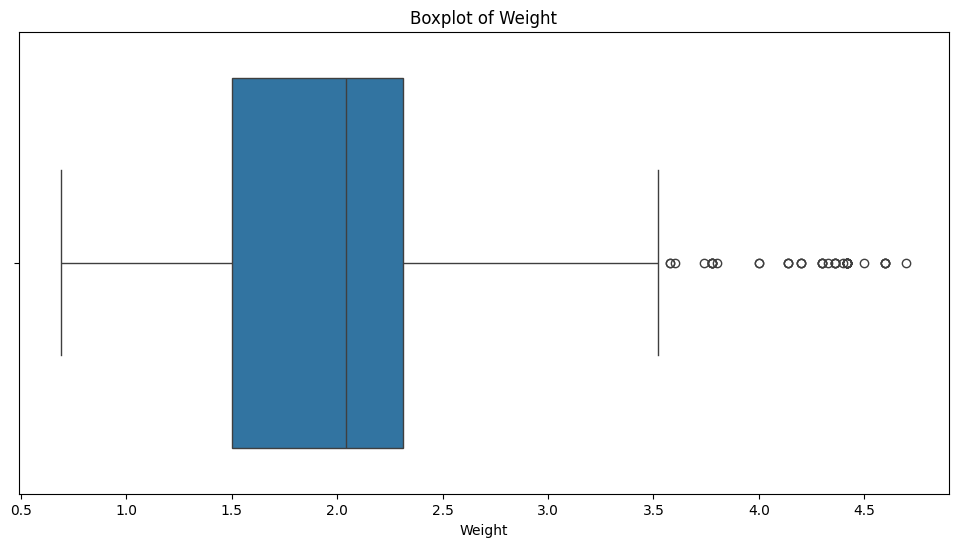

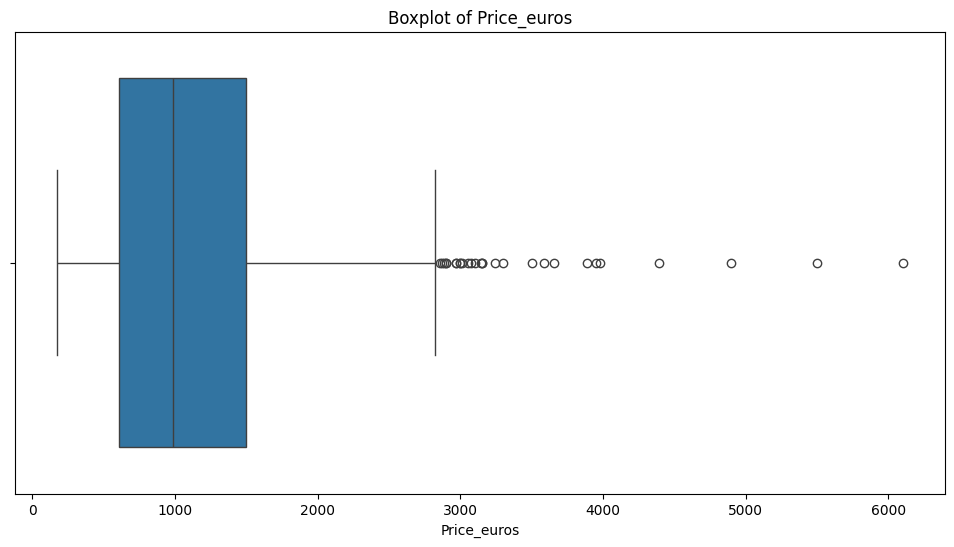

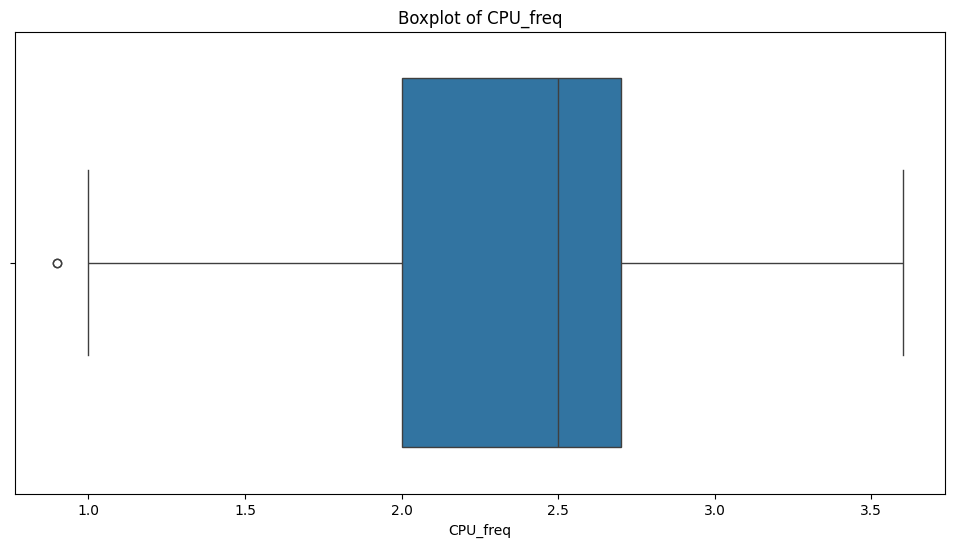

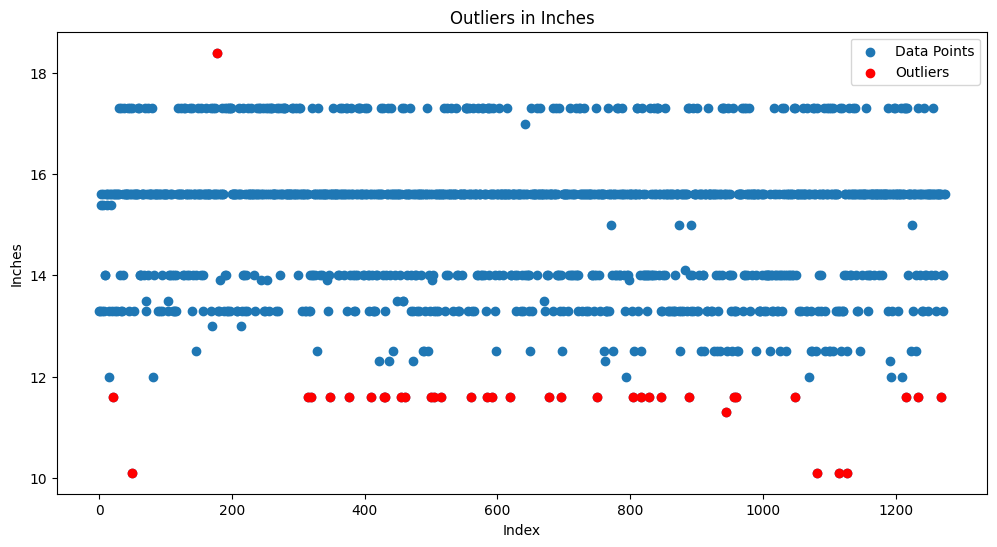

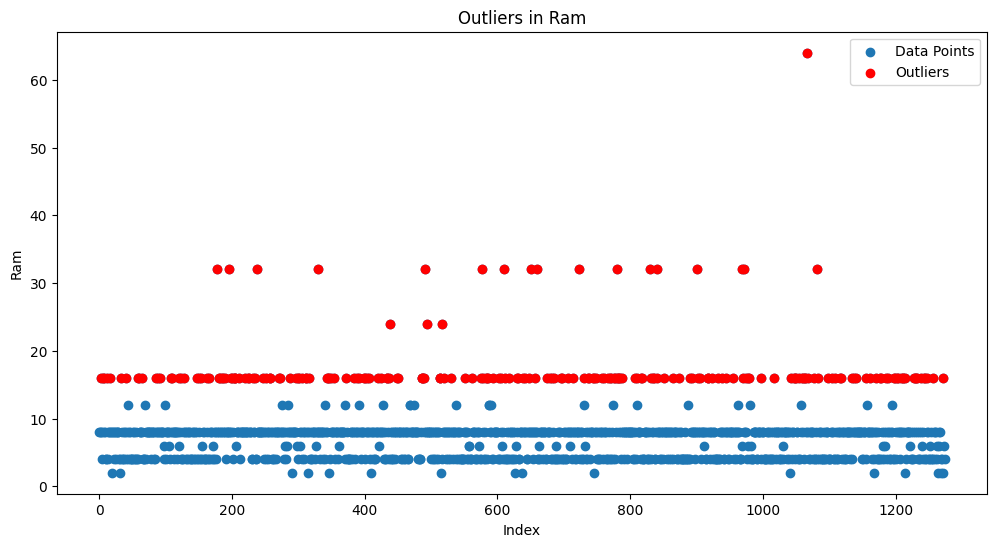

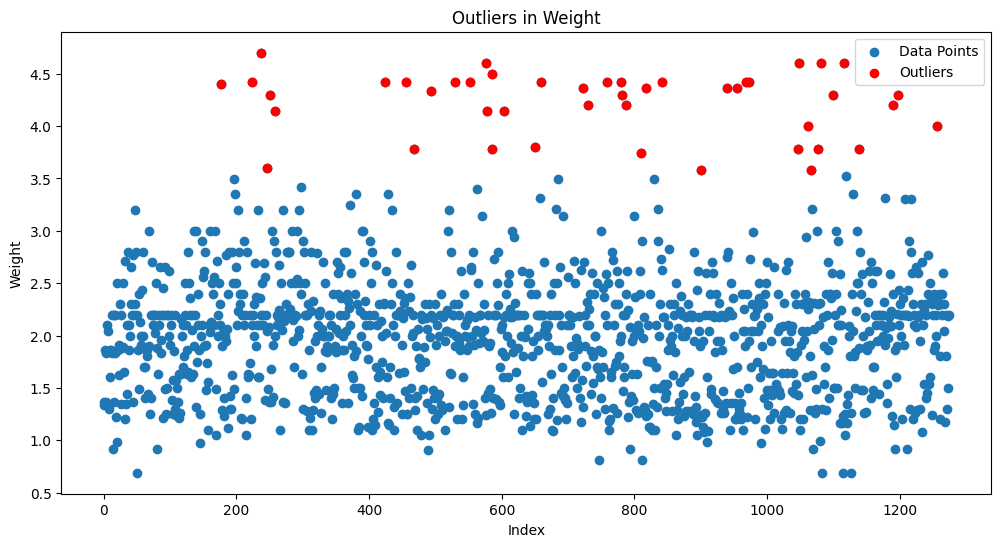

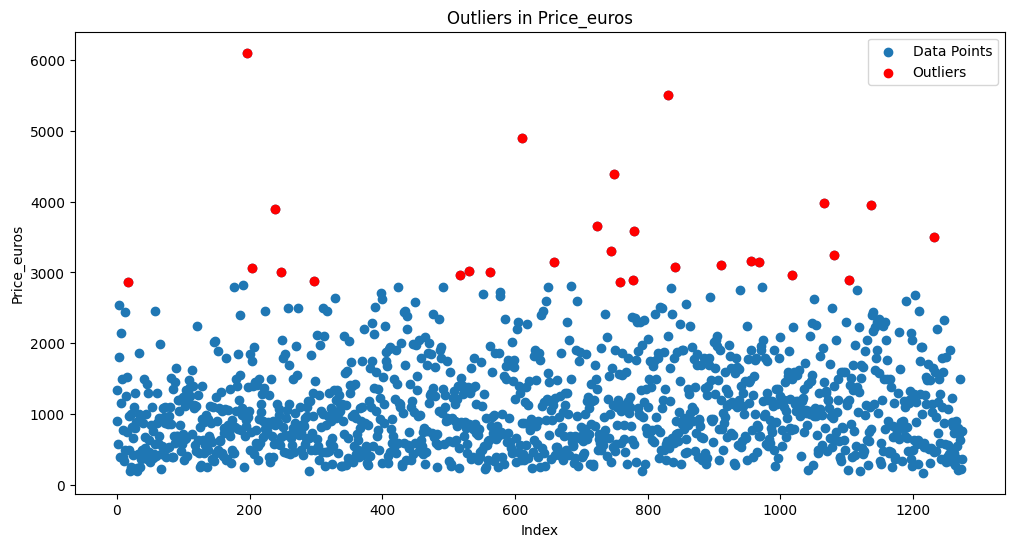

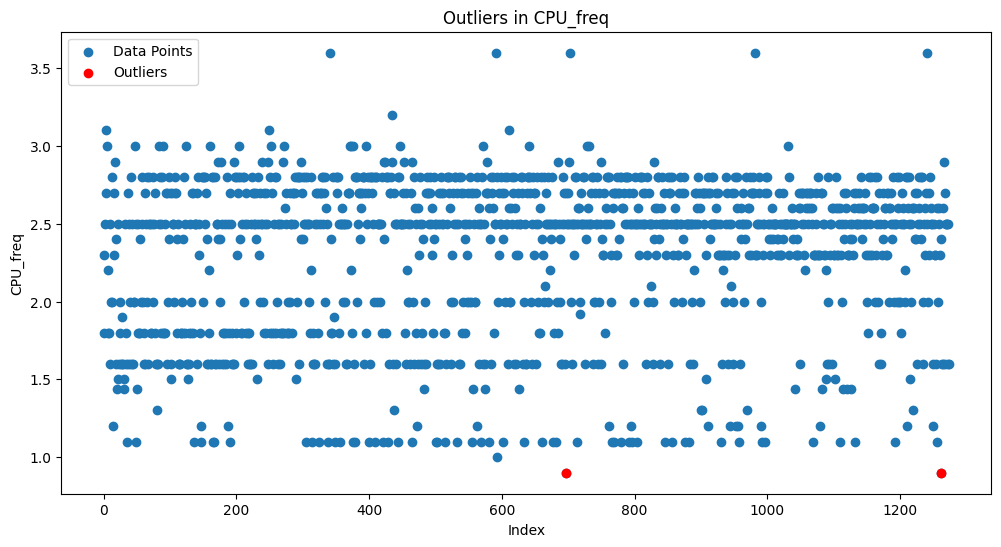

In [30]:
# prompt: identify outliers in numerical columns

import matplotlib.pyplot as plt
import numpy as np
# Identify outliers using boxplots for all numerical columns
numerical_cols = df_selected.select_dtypes(include=np.number).columns
for col in numerical_cols:
  plt.figure(figsize=(12, 6))
  sns.boxplot(x=col, data=df_selected)
  plt.title(f'Boxplot of {col}')
  plt.show()

# Identify outliers using IQR for all numerical columns
for col in numerical_cols:
  Q1 = df_selected[col].quantile(0.25)
  Q3 = df_selected[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df_selected[(df_selected[col] < lower_bound) | (df_selected[col] > upper_bound)]

  # Plot the outliers
  plt.figure(figsize=(12, 6))
  plt.scatter(df_selected.index, df_selected[col], label='Data Points')
  plt.scatter(outliers.index, outliers[col], color='red', label='Outliers')
  plt.xlabel('Index')
  plt.ylabel(col)
  plt.title(f'Outliers in {col}')
  plt.legend()
  plt.show()


In [31]:
# prompt: remove outlier and revised dataframe

# Identify outliers using IQR for all numerical columns and remove them
df_no_outliers = df_selected.copy()  # Create a copy to avoid modifying the original DataFrame

for col in numerical_cols:
  Q1 = df_no_outliers[col].quantile(0.25)
  Q3 = df_no_outliers[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]

# Print the shape of the original and the new DataFrame
print(f"Original DataFrame shape: {df_selected.shape}")
print(f"DataFrame shape after removing outliers: {df_no_outliers.shape}")

# Now df_no_outliers contains the DataFrame with outliers removed.


Original DataFrame shape: (1275, 9)
DataFrame shape after removing outliers: (977, 9)


In [32]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 977 entries, 0 to 1274
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      977 non-null    object 
 1   TypeName     977 non-null    object 
 2   Inches       977 non-null    float64
 3   Ram          977 non-null    int64  
 4   OS           977 non-null    object 
 5   Weight       977 non-null    float64
 6   Price_euros  977 non-null    float64
 7   CPU_freq     977 non-null    float64
 8   GPU_model    977 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 76.3+ KB


In [33]:
numerical_cols = df_no_outliers.select_dtypes(include=np.number).columns
categorical_cols = df_no_outliers.select_dtypes(include='object').columns

In [34]:
numerical_cols

Index(['Inches', 'Ram', 'Weight', 'Price_euros', 'CPU_freq'], dtype='object')

In [35]:
categorical_cols

Index(['Company', 'TypeName', 'OS', 'GPU_model'], dtype='object')

In [36]:
df_no_outliers.Company.unique()

array(['Apple', 'HP', 'Acer', 'Dell', 'Lenovo', 'Chuwi', 'Asus',
       'Microsoft', 'MSI', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero',
       'Google', 'Mediacom', 'Fujitsu', 'Samsung', 'LG', 'Razer'],
      dtype=object)

In [37]:
df_no_outliers.TypeName.unique()

array(['Ultrabook', 'Notebook', 'Gaming', '2 in 1 Convertible',
       'Workstation', 'Netbook'], dtype=object)

In [39]:
df_no_outliers.OS.unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [40]:
df_no_outliers.GPU_model.unique()

array(['Iris Plus Graphics 640', 'HD Graphics 6000', 'HD Graphics 620',
       'Iris Plus Graphics 650', 'Radeon R5', 'UHD Graphics 620',
       'HD Graphics 520', 'Radeon R5 M430', 'HD Graphics 615',
       'GeForce 940MX', 'GeForce GTX 1050', 'Radeon R2', 'Radeon 530',
       'GeForce 930MX', 'HD Graphics', 'HD Graphics 500',
       'GeForce 930MX ', 'GeForce 150MX', 'Iris Graphics 540',
       'GeForce 920MX', 'GeForce MX150', 'Radeon R4 Graphics',
       'Radeon 520', 'HD Graphics 400', 'GeForce GTX 1050 Ti',
       'GeForce MX130', 'R4 Graphics', 'GeForce GTX 940MX',
       'Radeon RX 560', 'GeForce GTX 1060', 'GeForce 920M',
       'Radeon R7 M445', 'Radeon RX 550', 'GeForce GTX 1050M',
       'HD Graphics 515', 'Radeon R5 M420', 'HD Graphics 505',
       'R17M-M1-70', 'GeForce 920MX ', 'GeForce GTX 950M',
       'FirePro W4190M ', 'Iris Graphics 550', 'GeForce 930M',
       'HD Graphics 630', 'Radeon R5 430', 'GeForce GTX 940M',
       'HD Graphics 510', 'Radeon RX 540', 'Quadro

In [41]:


def extract_gpu_number(gpu_model):
  """Extracts the last numeric value from the GPU model string."""
  try:
    parts = gpu_model.split()
    if parts:
      last_part = parts[-1]
      if last_part.isdigit():
        return int(last_part)
      else:
        return None  # Handle cases where the last part is not a number
    else:
      return None
  except:
    return None

# Apply the function to the 'GPU_model' column
df_no_outliers['GPU_Number'] = df_no_outliers['GPU_model'].apply(extract_gpu_number)

# Print the updated DataFrame with the new 'GPU_Number' column
print(df_no_outliers[['GPU_model', 'GPU_Number']].head())


                GPU_model  GPU_Number
0  Iris Plus Graphics 640       640.0
1        HD Graphics 6000      6000.0
2         HD Graphics 620       620.0
4  Iris Plus Graphics 650       650.0
5               Radeon R5         NaN


In [44]:
df_no_outliers.GPU_Number.fillna(df_no_outliers.GPU_Number.mean(), inplace=True)

In [45]:
df_no_outliers.GPU_Number.isnull().sum()

0

In [47]:
df_no_outliers.drop('GPU_model', axis=1, inplace=True)

In [48]:
df_no_outliers.head()

,Company,TypeName,Inches,Ram,OS,Weight,Price_euros,CPU_freq,GPU_Number
0,Apple,Ultrabook,13.3,8,macOS,1.37,1339.69,2.3,640.000000
1,Apple,Ultrabook,13.3,8,macOS,1.34,898.94,1.8,6000.000000
2,HP,Notebook,15.6,8,No OS,1.86,575.00,2.5,620.000000
4,Apple,Ultrabook,13.3,8,macOS,1.37,1803.60,3.1,650.000000
5,Acer,Notebook,15.6,4,Windows 10,2.10,400.00,3.0,657.133713


In [49]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [50]:
X=df_no_outliers.drop('Price_euros', axis=1)
y=df_no_outliers['Price_euros']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
X.head(2)

,Company,TypeName,Inches,Ram,OS,Weight,CPU_freq,GPU_Number
0,Apple,Ultrabook,13.3,8,macOS,1.37,2.3,640.0
1,Apple,Ultrabook,13.3,8,macOS,1.34,1.8,6000.0


In [54]:
categories=[['Ultrabook', 'Notebook', 'Gaming', '2 in 1 Convertible', 'Workstation', 'Netbook'],['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Windows 10 S', 'Chrome OS', 'Windows 7']]

In [55]:
 tr01 = ColumnTransformer(
    transformers=[
        # Scaling numerical columns (using column indices, e.g., 2, 3, 5, 6, 7)
        ("scaler", StandardScaler(), [2, 3, 5, 6, 7]),

        # OneHotEncoding for categorical column (e.g., index 0)
        ("ohe", OneHotEncoder(drop="first"), [0]),

        # Ordinal Encoding for specific columns (e.g., indices 1 and 4)
        ("ordinal", OrdinalEncoder(categories=categories), [1, 4])
    ],
    remainder="passthrough"  # Keep the rest of the columns as they are
)

In [57]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [58]:
tr02=SelectKBest(score_func=f_regression, k=10)

In [59]:
tr03=LinearRegression()

In [60]:
pipe=Pipeline(steps=[
    ('tr01', tr01),
    ('tr02', tr02),
    ('tr03', tr03)
])

In [61]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('tr01',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  [2, 3, 5, 6, 7]),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  [0]),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Ultrabook',
                                                                              'Notebook',
                                                                              'Gaming',
                                                                              '2 '
                                                                              'in '
                                                                              '1 '
                                                                              'Convertible',
                                                                              'Workstation',
                                                                              'Netbook'],
                                                                             ['macOS',
                                                                              'No '
                                                                              'OS',
                                                                              'Windows '
                                                                              '10',
                                                                              'Mac '
                                                                              'OS '
                                                                              'X',
                                                                              'Linux',
                                                                              'Windows '
                                                                              '10 '
                                                                              'S',
                                                                              'Chrome '
                                                                              'OS',
                                                                              'Windows '
                                                                              '7']]),
                                                  [1, 4])])),
                ('tr02',
                 SelectKBest(score_func=<function f_regression at 0x7e2b114237f0>)),
                ('tr03', LinearRegression())])

In [62]:
pipe.score(X_test, y_test)

0.4890987042109517

In [63]:
from sklearn.metrics import mean_squared_error, r2_score

In [64]:
r2_score(y_test, pipe.predict(X_test))

0.4890987042109517

In [85]:
tr03=RandomForestRegressor()

In [87]:
pipe_dr=Pipeline(steps=[
    ('tr01', tr01),
    ('tr03', tr03)
])

In [88]:
pipe_dr.fit(X_train, y_train)

Pipeline(steps=[('tr01',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  [2, 3, 5, 6, 7]),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  [0]),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Ultrabook',
                                                                              'Notebook',
                                                                              'Gaming',
                                                                              '2 '
                                                                              'in '
                                                                              '1 '
                                                                              'Convertible',
                                                                              'Workstation',
                                                                              'Netbook'],
                                                                             ['macOS',
                                                                              'No '
                                                                              'OS',
                                                                              'Windows '
                                                                              '10',
                                                                              'Mac '
                                                                              'OS '
                                                                              'X',
                                                                              'Linux',
                                                                              'Windows '
                                                                              '10 '
                                                                              'S',
                                                                              'Chrome '
                                                                              'OS',
                                                                              'Windows '
                                                                              '7']]),
                                                  [1, 4])])),
                ('tr03', RandomForestRegressor())])

In [89]:
pipe_dr.score(X_test, y_test)

0.7902728784177497

In [84]:
tr03=DecisionTreeRegressor()

In [70]:
pipe_dr=Pipeline(steps=[
    ('tr01', tr01),
    ('tr03', tr03)
])

In [71]:
pipe_dr.fit(X_train, y_train)

Pipeline(steps=[('tr01',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  [2, 3, 5, 6, 7]),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  [0]),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Ultrabook',
                                                                              'Notebook',
                                                                              'Gaming',
                                                                              '2 '
                                                                              'in '
                                                                              '1 '
                                                                              'Convertible',
                                                                              'Workstation',
                                                                              'Netbook'],
                                                                             ['macOS',
                                                                              'No '
                                                                              'OS',
                                                                              'Windows '
                                                                              '10',
                                                                              'Mac '
                                                                              'OS '
                                                                              'X',
                                                                              'Linux',
                                                                              'Windows '
                                                                              '10 '
                                                                              'S',
                                                                              'Chrome '
                                                                              'OS',
                                                                              'Windows '
                                                                              '7']]),
                                                  [1, 4])])),
                ('tr03', DecisionTreeRegressor())])

In [72]:
pipe_dr.score(X_test, y_test)

0.6747546208129043

In [73]:
tr03=SVR()

In [74]:
pipe_dr=Pipeline(steps=[
    ('tr01', tr01),
    ('tr03', tr03)
])

In [75]:
pipe_dr.fit(X_train, y_train)

Pipeline(steps=[('tr01',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  [2, 3, 5, 6, 7]),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  [0]),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Ultrabook',
                                                                              'Notebook',
                                                                              'Gaming',
                                                                              '2 '
                                                                              'in '
                                                                              '1 '
                                                                              'Convertible',
                                                                              'Workstation',
                                                                              'Netbook'],
                                                                             ['macOS',
                                                                              'No '
                                                                              'OS',
                                                                              'Windows '
                                                                              '10',
                                                                              'Mac '
                                                                              'OS '
                                                                              'X',
                                                                              'Linux',
                                                                              'Windows '
                                                                              '10 '
                                                                              'S',
                                                                              'Chrome '
                                                                              'OS',
                                                                              'Windows '
                                                                              '7']]),
                                                  [1, 4])])),
                ('tr03', SVR())])

In [76]:
pipe_dr.score(X_test, y_test)

0.07121555088466336

In [78]:
from sklearn.neighbors import KNeighborsRegressor


In [79]:
tr03=KNeighborsRegressor()

In [80]:
pipe_dr=Pipeline(steps=[
    ('tr01', tr01),
    ('tr03', tr03)
])

In [81]:
pipe_dr.fit(X_train, y_train)

Pipeline(steps=[('tr01',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  [2, 3, 5, 6, 7]),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  [0]),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Ultrabook',
                                                                              'Notebook',
                                                                              'Gaming',
                                                                              '2 '
                                                                              'in '
                                                                              '1 '
                                                                              'Convertible',
                                                                              'Workstation',
                                                                              'Netbook'],
                                                                             ['macOS',
                                                                              'No '
                                                                              'OS',
                                                                              'Windows '
                                                                              '10',
                                                                              'Mac '
                                                                              'OS '
                                                                              'X',
                                                                              'Linux',
                                                                              'Windows '
                                                                              '10 '
                                                                              'S',
                                                                              'Chrome '
                                                                              'OS',
                                                                              'Windows '
                                                                              '7']]),
                                                  [1, 4])])),
                ('tr03', KNeighborsRegressor())])

In [82]:
pipe_dr.score(X_test, y_test)

0.7211750066891246

In [90]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# prompt: Random forest is giving good accurcy assume tr03 random forest set various hyper meters to improve the accuracy

from sklearn.model_selection import GridSearchCV

tr03 = RandomForestRegressor()

# Define the parameter grid to search
param_grid = {
    'tr03__n_estimators': [100, 200, 300],  # Number of trees in the forest
    'tr03__max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'tr03__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'tr03__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

pipe_dr = Pipeline(steps=[
    ('tr01', tr01),
    ('tr03', tr03)
])

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=pipe_dr, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate the model with the best parameters on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R2 score on test set:", r2)


In [91]:
paramets=param_grid = {
    'tr03__n_estimators': [100, 200, 300],  # Number of trees in the forest
    'tr03__max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'tr03__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'tr03__min_samples_leaf': [1, 2, 4]}  # Minimum number of samples required to be at a leaf node

In [92]:
grid= GridSearchCV(estimator=pipe_dr,param_grid=paramets,scoring='neg_mean_squared_error',cv=10)

In [93]:
grid.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_re

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tr01',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         [2, 3,
                                                                          5, 6,
                                                                          7]),
                                                                        ('ohe',
                                                                         OneHotEncoder(drop='first'),
                                                                         [0]),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(categories=[['Ultrabook',
                                                                                                     'Notebook',
                                                                                                     'Gaming',
                                                                                                     '2 '
                                                                                                     'in '
                                                                                                     '1 '
                                                                                                     'Convertible',
                                                                                                     'Workstation',
                                                                                                     'Netbook'],
                                                                                                    ['macOS',
                                                                                                     'No '
                                                                                                     'OS',
                                                                                                     'Windows '
                                                                                                     '10',
                                                                                                     'Mac '
                                                                                                     'OS '
                                                                                                     'X',
                                                                                                     'Linux',
                                                                                                     'Windows '
                                                                                                     '10 '
                                                                                                     'S',
                                                                                                     'Chrome '
                                                                                                     'OS',
                                                                                                     'Windows '
                                                                                                     '7']]),
                                                                         [1,
                                                                          4])])),
                                       ('tr03', RandomForestRegressor())]),
             param_grid={'tr03__max_depth': [None, 10, 20, 30],
                         'tr03__min_samples_leaf': [

In [94]:
grid.best_params_

{'tr03__max_depth': None,
 'tr03__min_samples_leaf': 1,
 'tr03__min_samples_split': 2,
 'tr03__n_estimators': 100}

In [95]:
grid.best_score_

nan

In [96]:
grid.best_estimator_

Pipeline(steps=[('tr01',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  [2, 3, 5, 6, 7]),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  [0]),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Ultrabook',
                                                                              'Notebook',
                                                                              'Gaming',
                                                                              '2 '
                                                                              'in '
                                                                              '1 '
                                                                              'Convertible',
                                                                              'Workstation',
                                                                              'Netbook'],
                                                                             ['macOS',
                                                                              'No '
                                                                              'OS',
                                                                              'Windows '
                                                                              '10',
                                                                              'Mac '
                                                                              'OS '
                                                                              'X',
                                                                              'Linux',
                                                                              'Windows '
                                                                              '10 '
                                                                              'S',
                                                                              'Chrome '
                                                                              'OS',
                                                                              'Windows '
                                                                              '7']]),
                                                  [1, 4])])),
                ('tr03', RandomForestRegressor())])

In [97]:
grid.best_index_

0